#Import_liberly

In [209]:
# load packages
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from matplotlib import pyplot as plt
import pandas_datareader as web
from IPython.display import set_matplotlib_formats



#Import_Data

In [210]:
# ind = pd.read_csv("https://raw.githubusercontent.com/nutdnuy/Portfolio_optimization_with_Python/master/data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
# ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [211]:
# ind

In [212]:
ind = pd.read_csv('data-t.csv', encoding='ISO-8859-1')

def convert_to_float(value):
  try:
    return float(value.strip('%')) / 100
  except ValueError:
    return float('NaN')
  
columns_with_percentage = ['KTB.BK', 'PTTEP.BK', 'TTB.BK', 'MEGA.BK','CPALL.BK','CENTEL.BK', 'MINT.BK', 'ADVANC.BK', 'HANA.BK', 'OSP.BK']



# for col in columns_with_percentage:
#   ind[col] = pd.to_numeric(ind[col].str.replace('%', ''), errors='coerce')

ind['Date'] = pd.to_datetime(ind['Date'])

ind.index = ind['Date'].dt.strftime('%Y-%m')
ind.drop('Date', axis=1, inplace=True)
ind.drop('1AM-GEM', axis=1, inplace=True)
ind.drop('Portfolio', axis=1, inplace=True)
ind.drop('SET', axis=1, inplace=True)

for col in columns_with_percentage:
  ind[col] = ind[col].apply(convert_to_float)

years = ind['2019':'2023']


ind.head(10)

,PTTEP.BK,TTB.BK,KTB.BK,MEGA.BK,CPALL.BK,CENTEL.BK,MINT.BK,ADVANC.BK,HANA.BK,OSP.BK
Date,,,,,,,,,,
2019-10,-0.0041,-0.0864,-0.0355,-0.0834,-0.0408,-0.1823,-0.0408,0.0401,-0.1024,0.1319
2019-11,-0.0042,0.1054,-0.0121,0.0591,-0.0260,0.0091,0.0671,-0.0771,0.2033,-0.0359
2019-12,0.0368,0.0488,0.0000,-0.1596,-0.0506,-0.1044,-0.0671,0.0047,0.0989,-0.0123
2020-01,0.0000,-0.1752,-0.0185,0.0470,-0.0210,-0.1416,-0.1576,-0.0432,0.0215,0.0886
2020-02,-0.1609,-0.2574,-0.1398,-0.0862,-0.0733,-0.1869,-0.1267,-0.0198,-0.0509,-0.0582
2020-03,-0.4513,-0.2140,-0.2054,-0.1188,-0.0750,-0.1560,-0.4928,0.0050,-0.3761,-0.1551
2020-04,0.2246,0.0870,-0.0357,0.2672,0.1518,0.3383,0.2276,-0.0150,0.2318,0.1491
2020-05,-0.0059,0.1806,-0.0561,0.1664,-0.0071,0.1422,-0.1260,-0.0282,0.0339,0.0238
2020-06,0.0883,-0.0910,-0.0097,0.0840,-0.0398,-0.0794,0.1026,-0.0397,-0.0780,-0.1119


In [213]:
def annualize_rets(r, periods_per_year):
  """
  Annualizes a set of returns
  We should infer the periods per year
  but that is currently left as an exercise
  to the reader :-)
  """
  compounded_growth = (1+r).prod()
  n_periods = r.shape[0]
  return compounded_growth**(periods_per_year/n_periods)-1

In [214]:
cov = years.cov()
cov

,PTTEP.BK,TTB.BK,KTB.BK,MEGA.BK,CPALL.BK,CENTEL.BK,MINT.BK,ADVANC.BK,HANA.BK,OSP.BK
PTTEP.BK,0.011706,0.006788,0.005302,0.004093,0.003852,0.007747,0.012024,-0.000045,0.004363,0.004118
TTB.BK,0.006788,0.011147,0.005360,0.002919,0.003699,0.007955,0.008881,0.000856,0.003287,0.003002
KTB.BK,0.005302,0.005360,0.005157,0.000952,0.002369,0.004745,0.006979,0.000318,-0.000200,0.001711
MEGA.BK,0.004093,0.002919,0.000952,0.009011,0.000981,0.005121,0.004663,-0.000170,0.005382,0.001613
CPALL.BK,0.003852,0.003699,0.002369,0.000981,0.004611,0.004805,0.006018,0.000499,0.001219,0.002579
CENTEL.BK,0.007747,0.007955,0.004745,0.005121,0.004805,0.018042,0.012743,-0.000810,0.000175,0.002294
MINT.BK,0.012024,0.008881,0.006979,0.004663,0.006018,0.012743,0.021387,-0.000305,0.004403,0.004486
ADVANC.BK,-0.000045,0.000856,0.000318,-0.000170,0.000499,-0.000810,-0.000305,0.002014,0.000146,0.000712
HANA.BK,0.004363,0.003287,-0.000200,0.005382,0.001219,0.000175,0.004403,0.000146,0.024553,0.002920
OSP.BK,0.004118,0.003002,0.001711,0.001613,0.002579,0.002294,0.004486,0.000712,0.002920,0.005732


In [215]:
er = annualize_rets(years, 12)
er

PTTEP.BK     0.034934
TTB.BK      -0.094933
KTB.BK      -0.021125
MEGA.BK      0.075412
CPALL.BK    -0.077341
CENTEL.BK    0.027448
MINT.BK     -0.170891
ADVANC.BK   -0.047849
HANA.BK      0.038087
OSP.BK      -0.112472
dtype: float64

In [216]:
l = ['PTTEP.BK', 'TTB.BK',	'KTB.BK',	'MEGA.BK']
cov.loc[l,l]

,PTTEP.BK,TTB.BK,KTB.BK,MEGA.BK
PTTEP.BK,0.011706,0.006788,0.005302,0.004093
TTB.BK,0.006788,0.011147,0.005360,0.002919
KTB.BK,0.005302,0.005360,0.005157,0.000952
MEGA.BK,0.004093,0.002919,0.000952,0.009011


#Compute_Efficient Frontier

##2-Asset Class

In [217]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [218]:
weights[0]

array([0., 1.])

In [219]:
weights[4]

array([0.21052632, 0.78947368])

In [220]:
weights[19]

array([1., 0.])

In [221]:
def portfolio_return(weights, returns):
  """
  Computes the return on a portfolio from constituent returns and weights
  weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
  """
  return weights.T @ returns

In [222]:
def portfolio_vol(weights, covmat):
  """
  Computes the vol of a portfolio from a covariance matrix and constituent weights
  weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
  """
  return (weights.T @ covmat @ weights)**0.5

In [223]:
l = ['PTTEP.BK', 'TTB.BK']
rets = [portfolio_return(w, er[l]) for w in weights]
vols = [portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})


In [224]:
from scipy.optimize import minimize

def minimize_vol(target_return, er, cov):
  """
  Returns the optimal weights that achieve the target return
  given a set of expected returns and a covariance matrix
  """
  n = er.shape[0]
  init_guess = np.repeat(1/n, n)
  bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
  # construct the constraints
  weights_sum_to_1 = {
    'type': 'eq',
    'fun': lambda weights: np.sum(weights) - 1
  }
  return_is_target = {
    'type': 'eq',
    'args': (er,),
    'fun': lambda weights, er: target_return -
    portfolio_return(weights,er)
  }
  weights = minimize(
    portfolio_vol, 
    init_guess,
    args=(cov,), method='SLSQP',
    options={'disp': False},
    constraints=(weights_sum_to_1,return_is_target),
    bounds=bounds
  )
  return weights.x

In [225]:
weights_20 = minimize_vol(0.20, er[l], cov.loc[l,l])
vol_20 = portfolio_vol(weights_20, cov.loc[l,l])
vol_20

0.10819533841649895

###Plot

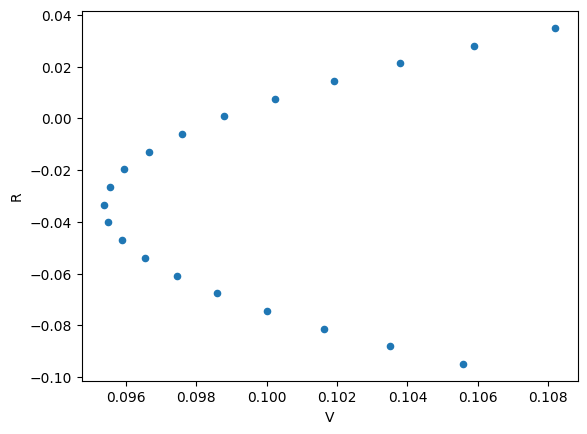

In [226]:
ef.plot.scatter(x="V", y="R");

In [227]:
def plot_ef2(n_points, er, cov):
  """
  Plots the 2-asset efficient frontier
  """
  if er.shape[0] != 2 or er.shape[0] != 2:
    raise ValueError("plot_ef2 can only plot 2-asset frontiers")
  weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
  rets = [portfolio_return(w, er) for w in weights]
  vols = [portfolio_vol(w, cov) for w in weights]
  ef = pd.DataFrame({
    "Returns": rets,
    "Volatility": vols
  })
  return ef.plot.line(x="Volatility", y="Returns", style=".-")

<AxesSubplot:xlabel='Volatility'>

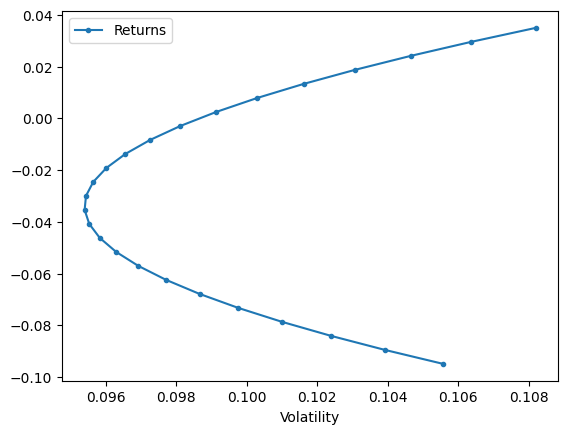

In [229]:
l = ['PTTEP.BK', 'TTB.BK']
plot_ef2(25, er[l].values, cov.loc[l,l])

##Muti Class

In [ ]:
from scipy.optimize import minimize

def minimize_vol(target_return, er, cov):
  """
  Returns the optimal weights that achieve the target return
  given a set of expected returns and a covariance matrix
  """
  n = er.shape[0]
  init_guess = np.repeat(1/n, n)
  bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
  # construct the constraints
  weights_sum_to_1 = {
    'type': 'eq',
                    'fun': lambda weights: np.sum(weights) - 1
  }
  return_is_target = {
    'type': 'eq',
    'args': (er,),
    'fun': lambda weights, er: target_return - portfolio_return(weights,er)
  }
  weights = minimize(
    portfolio_vol, 
    init_guess,
    args=(cov,), 
    method='SLSQP',
    options={'disp': False},
    constraints=(weights_sum_to_1,return_is_target),
    bounds=bounds
  )
  return weights.x

In [ ]:
def optimal_weights(n_points, er, cov):
  """
  """
  target_rs = np.linspace(er.min(), er.max(), n_points)
  weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
  return weights

def plot_ef(n_points, er, cov):
  """
  Plots the multi-asset efficient frontier
  """
  weights = optimal_weights(n_points, er, cov) # not yet implemented!
  rets = [portfolio_return(w, er) for w in weights]
  vols = [portfolio_vol(w, cov) for w in weights]
  ef = pd.DataFrame({
    "Returns": rets,
    "Volatility": vols
  })
  return ef.plot.line(x="Volatility", y="Returns", style='.-')

<AxesSubplot:xlabel='Volatility'>

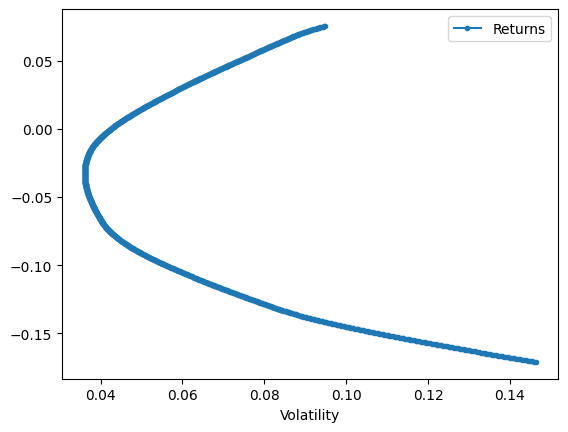

In [233]:
l = ['KTB.BK', 'PTTEP.BK', 'TTB.BK', 'MEGA.BK','CPALL.BK','CENTEL.BK', 'MINT.BK', 'ADVANC.BK', 'HANA.BK', 'OSP.BK']
plot_ef(1000, er[l], cov.loc[l,l])

In [232]:
weights_15 = minimize_vol(0.15, er[l], cov.loc[l,l])
vol_15 = portfolio_vol(weights_15, cov.loc[l,l])
vol_15

0.09492407257780672